### Classification using DT: Credit Risk

#### Context:
Credit risk is nothing but the default in payment of any loan by the borrower. In Banking sector this is an important factor to
be considered before approving the loan of an applicant.Dream Housing Finance company deals in all home loans. They have presence
across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer
eligibility for loan.

#### Objective:
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online
application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History
and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan
amount so that they can specifically target these customers. Here they have provided a partial data set.

Dataset:
You can find the dataset (CreditRisk) under the datasets section on the Canvas.

|Variable | Description|
| --- | --- |
| Loan_ID	        |  Unique Loan ID|
| Gender	        |  Male/ Female|
| Married	        |  Applicant married (Y/N)|
| Dependents	    |  Number of dependents |
| Education	        |Applicant Education (Graduate/ Under Graduate)|
| Self_Employed	    |    Self employed (Y/N)|
| ApplicantIncome	|  Applicant income|
| CoapplicantIncome |    Coapplicant income|
| LoanAmount	    |  Loan amount in thousands|
| Loan_Amount_Term  |    Term of loan in months|
| Credit_History	|  credit history meets guidelines|
| Property_Area	    |    Urban/ Semi Urban/ Rural|
| Loan_Status	    |  Loan approved (Y/N)|

### We will explore the dataset, clean and transform it, fit a model, and then measure the accuracy of the solution.

In [ ]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

Step 1: Import all the requisite libraries first. Importing seaborn for statistical plots, to split data frames into training set and test set, we will use sklearn package's data-splitting function, which is based on random function. To calculate accuracy measures and confusion matrices, we have imported metrics from sklearn.

In [ ]:
import pandas as pd

# importing ploting libraries
import matplotlib.pyplot as plt

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
import seaborn as sn
from sklearn.metrics import classification_report,confusion_matrix


Step 2: Load the dataset using read_csv command. The output is shown in the following.

In [ ]:
loan_df = pd.read_csv('CreditRisk.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


Step 3: Examine the shape of the data:

In [ ]:
loan_df.shape

(614, 13)

Step 4: drop 'Loan_ID' column as it will be 1-1 mapping anyways

In [ ]:
credit_df = loan_df.drop('Loan_ID', axis =1 )
credit_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360.0,1.0,Urban,1


Step 5: Next normalize the values of the Loan Value and visualize it too.

In [ ]:
credit_df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.853333
180.0    0.073333
480.0    0.025000
300.0    0.021667
240.0    0.006667
84.0     0.006667
120.0    0.005000
60.0     0.003333
36.0     0.003333
12.0     0.001667
Name: Loan_Amount_Term, dtype: float64

(array([  1.,   0.,   2.,   0.,   0.,   2.,   0.,   4.,   0.,   0.,   0.,
          3.,   0.,   0.,   0.,   0.,   0.,  44.,   0.,   0.,   0.,   0.,
          0.,   0.,   4.,   0.,   0.,   0.,   0.,   0.,  13.,   0.,   0.,
          0.,   0.,   0.,   0., 512.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  15.]),
 array([ 12.  ,  21.36,  30.72,  40.08,  49.44,  58.8 ,  68.16,  77.52,
         86.88,  96.24, 105.6 , 114.96, 124.32, 133.68, 143.04, 152.4 ,
        161.76, 171.12, 180.48, 189.84, 199.2 , 208.56, 217.92, 227.28,
        236.64, 246.  , 255.36, 264.72, 274.08, 283.44, 292.8 , 302.16,
        311.52, 320.88, 330.24, 339.6 , 348.96, 358.32, 367.68, 377.04,
        386.4 , 395.76, 405.12, 414.48, 423.84, 433.2 , 442.56, 451.92,
        461.28, 470.64, 480.  ]),
 <BarContainer object of 50 artists>)

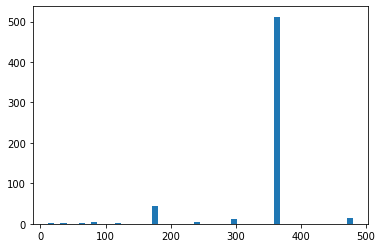

In [ ]:
plt.hist(credit_df['Loan_Amount_Term'], 50)

Step 6: Visualize the data next like a line chart.

Text(0.5, 1.0, 'Plot of the Loan Amount')

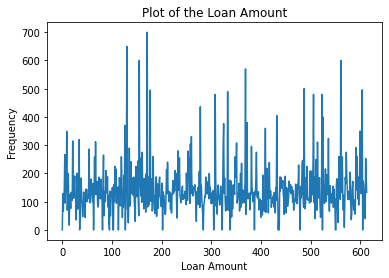

In [ ]:
plt.plot(credit_df.LoanAmount)
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title("Plot of the Loan Amount")

*Tip: We have shown only one visualization. You are advised to generate more graphs and plots. Remember, plots are a fantastic way to represent data intuitively!*

Step 7: The Loan_Amount_Term is highly skewed and hence we are deleting this variable.

In [ ]:
credit_df.drop(['Loan_Amount_Term'], axis=1, inplace=True)

Step 8: Missing value treatment is done next and each variable’s missing value is replaced with 0. Compare the results after replacing the missing values with median.

In [ ]:
credit_df = credit_df.fillna('0')
#credit_df = credit_df.replace({'NaN':credit_df.median()})
credit_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71,1.0,Rural,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40,1.0,Rural,1
611,Male,Yes,1,Graduate,No,8072,240.0,253,1.0,Urban,1
612,Male,Yes,2,Graduate,No,7583,0.0,187,1.0,Urban,1


Step 9: Next we will analyze how our variables are distributed.

In [ ]:
#Lets analysze the distribution of the various attribute
credit_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,614.0,141.166124,88.340630,0.0,98.0,125.0,164.75,700.0
Loan_Status,614.0,0.687296,0.463973,0.0,0.0,1.0,1.00,1.0


Step 10: Let us look at the target column, ‘Loan_Status’, to understand how the data is distributed among the various values.

In [ ]:
credit_df.groupby(["Loan_Status"]).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount
Loan_Status,,,
0,5446.078125,1877.807292,142.557292
1,5384.068720,1504.516398,140.533175


##### Additional Notes

You can do a quick visualization for all the variables in using only one command using the following code and as shown in the following graph. It depicts the relationship of loan status with all the variables.

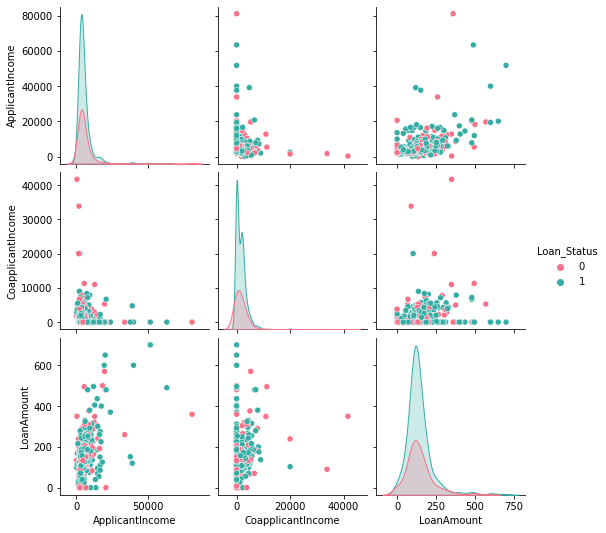

In [ ]:
import seaborn as sns
sns.pairplot(credit_df, hue="Loan_Status", palette="husl")

Step 11: Now we will convert X & Y variable to a categorical variable.

In [ ]:
#Convert X & Y variable to a categorical variable as relevant
credit_df['Loan_Status'] = credit_df['Loan_Status'].astype('category')
credit_df['Credit_History'] = credit_df['Credit_History'].astype('category')

Step 12: Check the data types present in the data we have now as shown in the output:

In [ ]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             614 non-null    object  
 1   Married            614 non-null    object  
 2   Dependents         614 non-null    object  
 3   Education          614 non-null    object  
 4   Self_Employed      614 non-null    object  
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         614 non-null    int64   
 8   Credit_History     614 non-null    category
 9   Property_Area      614 non-null    object  
 10  Loan_Status        614 non-null    category
dtypes: category(2), float64(1), int64(2), object(6)
memory usage: 44.7+ KB


Step 13: Check how the data is balanced. We will get the following output.

In [ ]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
prop_Y = credit_df['Loan_Status'].value_counts(normalize=True)
print(prop_Y)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64


**There seems to be a slight imbalance in the dataset as one class is 31.28% and the other is 68.72%**

Step 14: We will define the X and Y variables now.

In [ ]:
## Define X and Y variables
X = credit_df.drop('Loan_Status', axis=1)
Y = credit_df[['Loan_Status']]

Step 15: Using one-hot encoding we will convert the categorical variables to numeric variables:

In [ ]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)


Step 16: Now split into training and test sets. We are splitting into a ratio of 70:30

In [ ]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

Step 17: Build a model and fit the model using the training data. The .fit is the function used for it.

## Decision Tree Model building

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

Step 18: Once the model is ready and fit, we can use it to make a prediction. But first we have to check the accuracy of the model on the training data using confusion matrix; the output is as follows.

In [ ]:
pred_train = dt_classifier.predict(X_train)
from sklearn.metrics import classification_report,confusion_matrix
mat_train = confusion_matrix(y_train,pred_train)
print("confusion matrix = \n",mat_train)

confusion matrix = 
 [[138   0]
 [  0 291]]


Step 19: Next we will make the prediction for test set and visualize it, and we will get the following output.

In [ ]:
y_pred = dt_classifier.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 31  23]
 [ 31 100]]


In [ ]:
mat_test = confusion_matrix(y_test, y_pred)

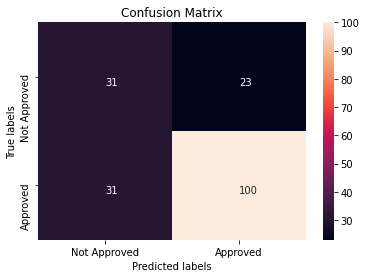

In [ ]:
ax= plt.subplot()
ax.set_ylim(2.0, 0)
annot_kws = {"ha": 'left',"va": 'top'}

sns.heatmap(mat_test, annot=True, ax = ax, fmt= 'g',annot_kws=annot_kws); #annot=True to annotate cells

# labels, title and ticks

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Approved', 'Approved']);
ax.yaxis.set_ticklabels(['Not Approved', 'Approved']);

Step 20: Let us now create the AUC ROC curve and get the AUC score. We will get the following output.

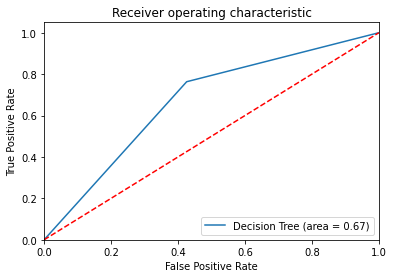

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dt_classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()